In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import linear_model
from sklearn.linear_model import lasso_path, enet_path
from itertools import cycle

import matplotlib.pyplot as plt

# Lasso in Sklearn

## data loading

In [3]:
retmat = pd.read_csv("replicatingHDG.dat", sep = " ")

X = retmat.copy()
X = X.drop(labels = "HDG", axis=1)

y = retmat["HDG"]

In [4]:
X.shape

(183, 1961)

## Lasso in Sklearn with LassoCV

In [5]:
from sklearn.linear_model import LassoCV

n_folds = 10
clf3 = LassoCV(n_alphas = 100, cv = n_folds, normalize = True)
clf3.fit(X, y);

## Graphic visualization of CV MSE vs $\alpha$ level

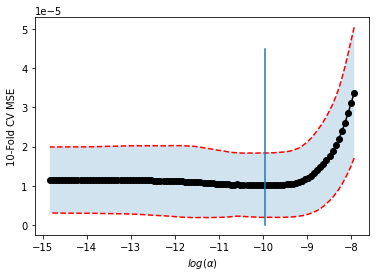

In [6]:
alpha_range = clf3.alphas_
mse_values = clf3.mse_path_.mean(axis = 1)
sd_values = clf3.mse_path_.std(axis = 1)

plt.plot(np.log(alpha_range), mse_values ,"k-o")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.plot([np.log(clf3.alpha_)]*2, [0,.000045])
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("10-Fold CV MSE");

In [7]:
plt.show()

## Sparse $\beta$ statistics from Optimal Model
Note: Sklearn takes the model with $\alpha_\text{min}$

In [8]:
# beta values
clf3.coef_

summary_table = pd.DataFrame({
    "names": np.array(retmat.columns)[:-1],
    "beta values": clf3.coef_
}, columns = ["names","beta values"])


summary_table

,names,beta values
0,DDD,0.0
1,MMM,0.0
2,AHC,0.0
3,AIR,0.0
4,AAN,0.0
...,...,...
1956,YPF,0.0
1957,YUM,0.0
1958,ZBH,0.0
1959,ZF,0.0


In [9]:
# beta values
clf3.coef_

summary_table = pd.DataFrame({
    "names": np.array(retmat.columns)[:-1][clf3.coef_!=0],
    "beta values": clf3.coef_[clf3.coef_!=0]
}, columns = ["names","beta values"])


summary_table

,names,beta values
0,GCH,0.019153
1,JEQ,0.001663
2,AFL,0.008402
3,B,0.000247
4,BDC,0.012896
5,BIO,0.001029
6,CII,0.006733
7,BGY,0.008492
8,CBG,0.012403
9,CEB,0.002052


# R 

The version that is better.

### Data

In [10]:
import rpy2
%load_ext rpy2.ipython

In [11]:
%%R -i retmat
retmat = as.matrix(retmat)

### glmnet code

In [12]:
%%R
library(glmnet)

# Get the data for the stock under consideration
# Note that the final column holds the response

glmnetout = glmnet(retmat[,-1962], retmat[,1962])


R[write to console]: Error in library(glmnet) : there is no package called ‘glmnet’

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages




Error in library(glmnet) : there is no package called ‘glmnet’


In [13]:
%%R
# Use cross-validation to choose optimal lambda. Note that this procedure is random.
set.seed(0)

cvglmout = cv.glmnet(retmat[,-1962], retmat[,1962])


R[write to console]: Error in cv.glmnet(retmat[, -1962], retmat[, 1962]) : 
  could not find function "cv.glmnet"




Error in cv.glmnet(retmat[, -1962], retmat[, 1962]) : 
  could not find function "cv.glmnet"


### Plots

In [14]:
%%R
plot(cvglmout,lwd=2)
abline(v=log(cvglmout$lambda.min),lty=3,lwd=2)
abline(v=log(cvglmout$lambda.1se),lty=3,lwd=2)

R[write to console]: Error in plot(cvglmout, lwd = 2) : object 'cvglmout' not found




Error in plot(cvglmout, lwd = 2) : object 'cvglmout' not found


In [15]:
%%R
beta_lasso = coef(glmnetout, s=cvglmout$lambda.1se)
beta_lasso = coef(glmnetout, s=cvglmout$lambda.min)


print(beta_lasso)


R[write to console]: Error in coef(glmnetout, s = cvglmout$lambda.1se) : 
  object 'glmnetout' not found




Error in coef(glmnetout, s = cvglmout$lambda.1se) : 
  object 'glmnetout' not found


In [16]:
%%R

beta_lasso_nz = beta_lasso[beta_lasso!=0]
names(beta_lasso_nz) = names(beta_lasso)[beta_lasso!=0]
print(beta_lasso_nz)



R[write to console]: Error in withVisible({ : object 'beta_lasso' not found




Error in withVisible({ : object 'beta_lasso' not found


---
